## Refreshing few tests-

In [ ]:
install.packages("car") # regression techniques are available in this package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
install.packages("MLmetrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [ ]:
library(car)
library(ggplot2)
library(MLmetrics)

Loading required package: carData


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall




# Recall - Comparing two independent samples??
# Welch test - or two sample t-test

In [ ]:
# compare means for automatic vs manual cars
mean(mtcars$mpg[mtcars$am==0])
mean(mtcars$mpg[mtcars$am==1])

[1] 17.14737

[1] 24.39231

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


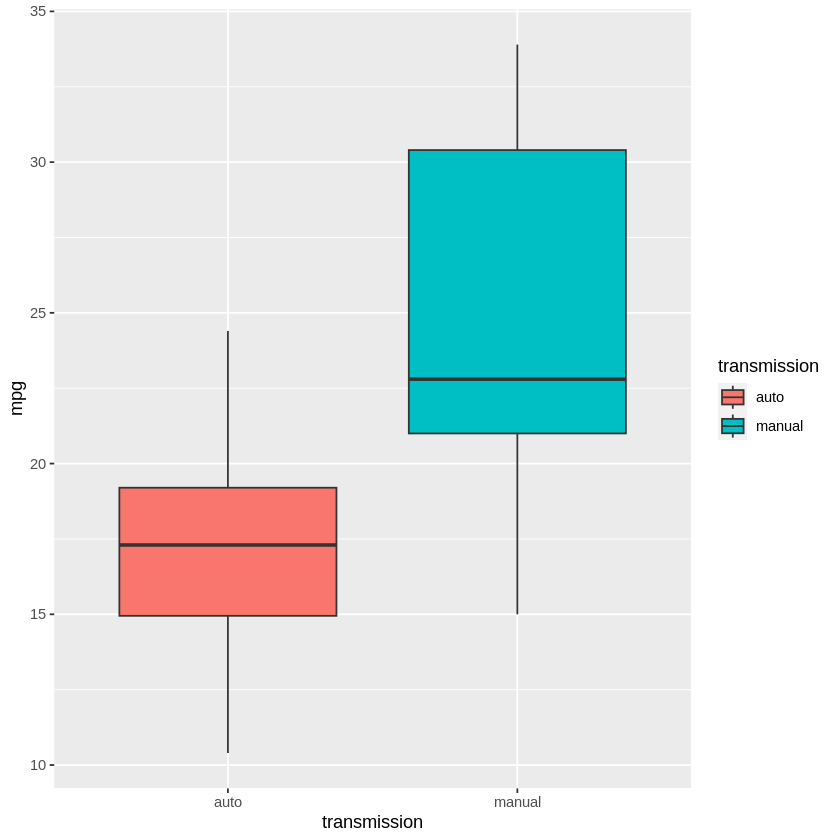

In [ ]:
mtcars.copy <- mtcars
mtcars.copy$transmission <- ifelse(mtcars$am==0, "auto", "manual") # convert the integers to labels
mtcars.copy$transmission <- factor(mtcars.copy$transmission) # convert it to categorical

# create a boxplot to compare the mpg distributions between auto and manual
qplot(transmission, mpg, data=mtcars.copy, geom="boxplot", fill=transmission) + guides(NA)

# We should check with a statistical test

In [ ]:
# check if the differencein means are statistically significant through a ttest
automatic.mpgs <- mtcars$mpg[mtcars$am==0]
manual.mpgs <- mtcars$mpg[mtcars$am==1]
t.test(automatic.mpgs, manual.mpgs, alternative="less")

# the p-value is < 0.05 = difference in means are statistically significant


	Welch Two Sample t-test

data:  automatic.mpgs and manual.mpgs
t = -3.7671, df = 18.332, p-value = 0.0006868
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -3.913256
sample estimates:
mean of x mean of y 
 17.14737  24.39231 


# OR another way to create a formula using the by (~) operator

In [ ]:
t.test(mpg ~ am, data=mtcars, alternative="less")


	Welch Two Sample t-test

data:  mpg by am
t = -3.7671, df = 18.332, p-value = 0.0006868
alternative hypothesis: true difference in means between group 0 and group 1 is less than 0
95 percent confidence interval:
      -Inf -3.913256
sample estimates:
mean in group 0 mean in group 1 
       17.14737        24.39231 


# Checking for clinical significance
You should not depend on the p-value alone.

In [ ]:
set.seed(16)
t.test(rnorm(1000000,mean=10), rnorm(1000000, mean=10)) # normalize the data

# We see that the difference in means is VERY small.
# the p-value only tells you ythe error. It doesn't tell us the clinical significance


	Welch Two Sample t-test

data:  rnorm(1e+06, mean = 10) and rnorm(1e+06, mean = 10)
t = -2.1466, df = 2e+06, p-value = 0.03183
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0058104638 -0.0002640601
sample estimates:
mean of x mean of y 
 9.997916 10.000954 


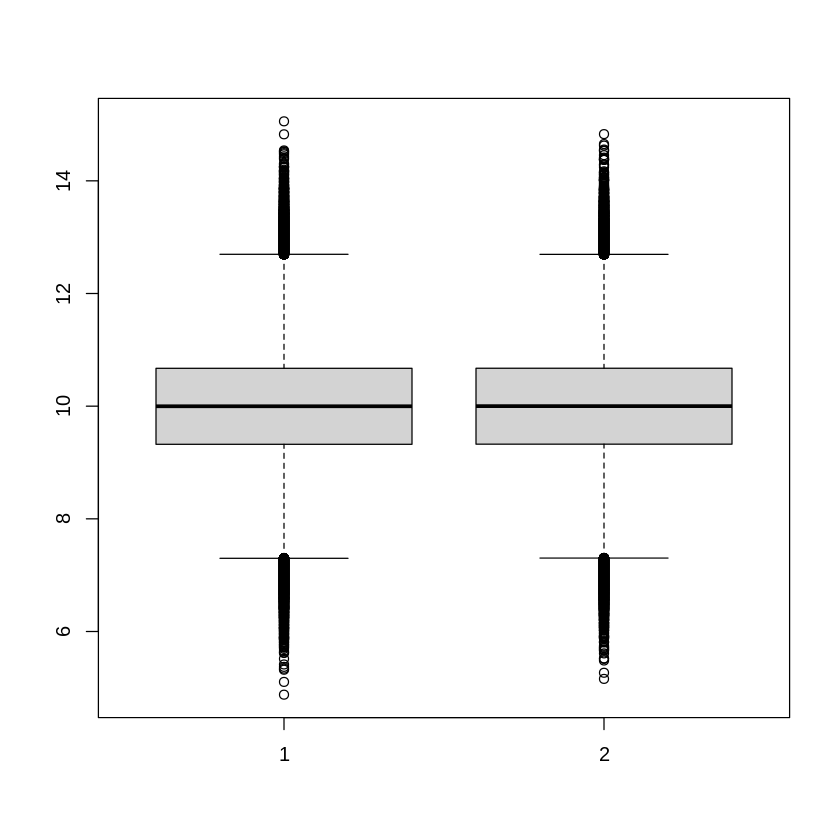

In [ ]:
# viewing the normalized distribution
boxplot(rnorm(1000000,mean=10), rnorm(1000000,mean=10))

# However, I can think of very few applications of statistics where .003 of anything is noteworthy even though it is,technically, statistically significant.

In [ ]:
install.packages("effsize")
library(effsize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# what proportion of the data is this test being applied to?
# we see that there is a 0.06% error (from the p-value from running ttest).
### but what proportion of the data is this error being applied to?
# tells us how many standard deviations lie between the two means
cohen.d(automatic.mpgs, manual.mpgs)

# the means of the two groups differs by 1.47 standard deviations

# we run Cohen's d when we are not confident about the t-statistic. This occurs when the d.f. is too sample (we have a small sample)
# we want a sample thats larger than 30 samples


Cohen's d

d estimate: -1.477947 (large)
95 percent confidence interval:
    lower     upper 
-2.304209 -0.651685 


# Another dataframe of weightloss

The WeightLoss dataset contains pounds lost and self esteem measurements for
three weeks for three different groups: a control group, one group just on a diet, and one group that dieted and exercised. We will be testing the hypothesis that the means of the weight loss at week 2 are not all equal:
*   H0 = the mean weight loss at week 2 between the control, diet group, and
diet and exercise group are equal
*   H1 = at least two of the means of weight loss at week 2 between the control,
diet group, and diet and exercise group are not equal

In [ ]:
WeightLoss

group,wl1,wl2,wl3,se1,se2,se3
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
Control,4,3,3,14,13,15
Control,4,4,3,13,14,17
Control,4,3,1,17,12,16
Control,3,2,1,11,11,12
Control,5,3,2,16,15,14
Control,6,5,4,17,18,18
Control,6,5,4,17,16,19
Control,5,4,1,13,15,15
Control,5,4,1,14,14,15


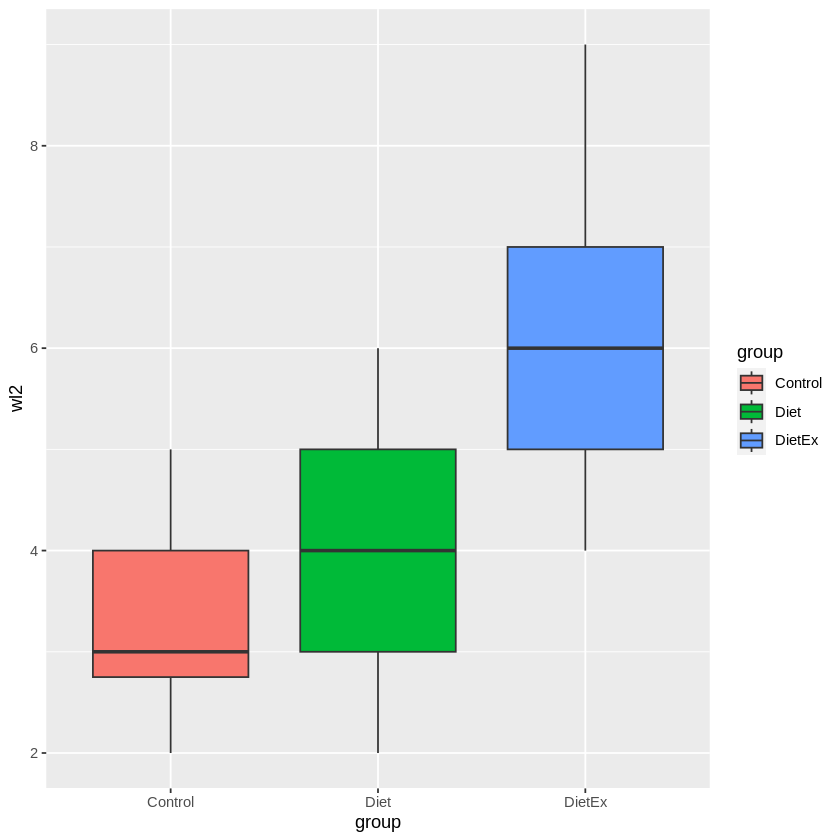

In [ ]:
# let's visualize the weight loss distributions across treatments
qplot(group, wl2, data=WeightLoss, geom="boxplot", fill=group)

# from this, we can see that DietEx has higher weight loss, but we can't be sure unless we do some statistical testing

In [ ]:
the.anova <- aov(wl2 ~ group, data=WeightLoss)

In [ ]:
summary(the.anova)

# F value : what proportion of data does it work on?
# pr(>F) : the p-value

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2  45.28  22.641   13.37 6.49e-05 ***
Residuals   31  52.48   1.693                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As I said before, this just means that at least one of the comparisons between means was significant—there are four ways that this could occur:
*   The means of diet and diet and exercise are different
*   The means of diet and control are different
*   The means of control and diet and exercise are different
*   The means of control, diet, and diet and exercise are all different

In order to investigate further, we perform a post-hoc test. Quite often, the post-hoc test that analysts perform is a suite of t-tests comparing each pair of means (pairwise t-tests).

NOTE: **ANOVA is an ombibus test statistic.** This means that it can't tell you which specific groups were statistically significantly different from each other, only that at least two of the groups were.

# But we said to be careful about alpha and multiple comparisons

The easiest multiple comparison correcting procedure to understand is Bonferroni
correction. In its simplest version, it simply changes the alpha value by dividing it by the number of tests being performed. It is considered the most conservative of all the multiple comparison correction methods. In fact, many consider it too conservative and I'm inclined to agree. Instead, I suggest using a correcting procedure called **Holm-Bonferroni correction**. R uses this by default.

Holm-Bonferroni correction: Checks if the differences are truly in the main part of the distribution or somewhere in the tails?
- at a certain point? or throughout the distribution?

In [ ]:
# comparing each group with each other
pairwise.t.test(WeightLoss$wl2, as.vector(WeightLoss$group))

# there is no statistically significant difference between Diet and Control
# there is statistically significant difference between DietEx and Control
# there is statistically significant difference between DietEx and Diet

# THUS: DietEx is best for weight loss


	Pairwise comparisons using t tests with pooled SD 

data:  WeightLoss$wl2 and as.vector(WeightLoss$group) 

       Control Diet   
Diet   0.28059 -      
DietEx 7.1e-05 0.00091

P value adjustment method: holm 

# Assumptions of ANOVA
The standard one-way ANOVA makes three main assumptions:
*   The observations are independent
*   The distribution of the residuals (the distances between the values within the groups to their respective means) is approximately normal
*   Homogeneity of variance: If you suspect that this assumption is violated, you can use R's oneway.test instead

# Did we test this for WeightLoss?

[1] 33 25

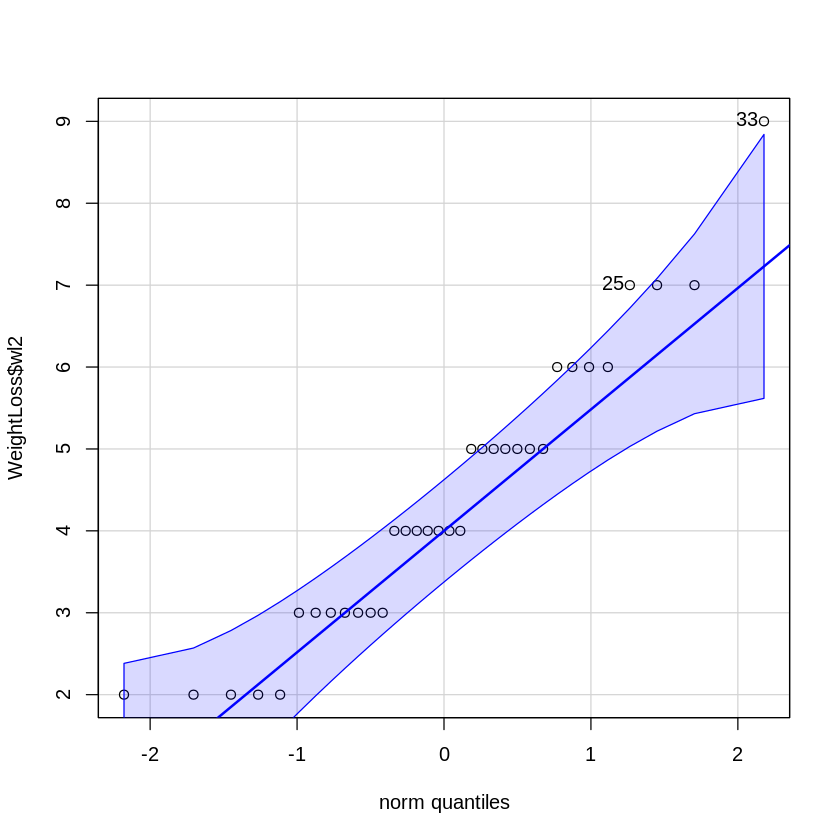

In [ ]:
# q-q plot
qqPlot(WeightLoss$wl2)

# from this plot, we can tell that the data is not normally distributed
# the points are not on the line

In [ ]:
# let's verify if the data is normal. Use shapiro-wilk normality test to check
shapiro.test(WeightLoss$wl2)

# p-value = 0.04 which is close not not less that 0.05. Not normally distributed
# since the data is not normally distributed, we have to run kruskal-wallis test which is the non-parametric version of ANOVA


	Shapiro-Wilk normality test

data:  WeightLoss$wl2
W = 0.93616, p-value = 0.04742


In [ ]:
# another way to check for normality
shapiro.test(the.anova$residuals)


	Shapiro-Wilk normality test

data:  the.anova$residuals
W = 0.96937, p-value = 0.4444


In [ ]:
# kruskal-wallis test which is the non-parametric version of ANOVA
kruskal.test(wl2 ~ group, data = WeightLoss)

# we see that p-value is less than 0.05
# the results are the same as running ANOVA

# Kruskal-Wallis is an omnibus test since it's not comparing each group individually.
# Thus, we need to do a paired ttest for nonparametric data.


	Kruskal-Wallis rank sum test

data:  wl2 by group
Kruskal-Wallis chi-squared = 14.747, df = 2, p-value = 0.0006275


# ** Testing independence of proportions**

In [ ]:
ucba <- as.data.frame(UCBAdmissions)
ucba

# we can stratify the frequences by admit, gender, and/or department

Admit,Gender,Dept,Freq
<fct>,<fct>,<fct>,<dbl>
Admitted,Male,A,512
Rejected,Male,A,313
Admitted,Female,A,89
Rejected,Female,A,19
Admitted,Male,B,353
Rejected,Male,B,207
Admitted,Female,B,17
Rejected,Female,B,8
Admitted,Male,C,120


In [ ]:
# xtabs allows us to group
# syntax is frequency ~ (for) Gender and Admit
cross.tab <- xtabs(Freq ~ Gender+Admit, data=ucba) # we're considering frequencies for gender and admit COMBINED
cross.tab

        Admit
Gender   Admitted Rejected
  Male       1198     1493
  Female      557     1278

In [ ]:
# if we only wanted to get frequencies for gender
cross.tab1 <- xtabs(Freq ~ Gender, data=ucba) # we're considering frequencies for gender
cross.tab1

cross.tab2 <- xtabs(Freq ~ Gender+Dept, data=ucba) # we're considering frequencies for gender and department COMBINED
cross.tab2

Gender
  Male Female 
  2691   1835 

        Dept
Gender     A   B   C   D   E   F
  Male   825 560 325 417 191 373
  Female 108  25 593 375 393 341

In [ ]:
chisq.test(cross.tab)

# we see that there is statistically significant difference between genders who are admitted and rejected


	Pearson's Chi-squared test with Yates' continuity correction

data:  cross.tab
X-squared = 91.61, df = 1, p-value < 2.2e-16


Is there a difference between gender who are admited/rejected across departments?

In [ ]:
cross.tab4 <- xtabs(Freq ~ Gender+Admit+Dept, data=ucba)
cross.tab4

, , Dept = A

        Admit
Gender   Admitted Rejected
  Male        512      313
  Female       89       19

, , Dept = B

        Admit
Gender   Admitted Rejected
  Male        353      207
  Female       17        8

, , Dept = C

        Admit
Gender   Admitted Rejected
  Male        120      205
  Female      202      391

, , Dept = D

        Admit
Gender   Admitted Rejected
  Male        138      279
  Female      131      244

, , Dept = E

        Admit
Gender   Admitted Rejected
  Male         53      138
  Female       94      299

, , Dept = F

        Admit
Gender   Admitted Rejected
  Male         22      351
  Female       24      317


In [ ]:
# we have to get the chi-square for each of the departments
apply(cross.tab4, 3, chisq.test)
# cross.tab4 is the data we're looking at
# 3 is the location in which the data for each department is located. we see , , Dept=A. something, something, Dept.
# chisq.test is the function we want to apply for each department


# Department A has a p-value is less that 0.05 which means that in this deparment, there is a difference between gender and admits

$A

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 16.372, df = 1, p-value = 5.205e-05


$B

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 0.085098, df = 1, p-value = 0.7705


$C

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 0.63322, df = 1, p-value = 0.4262


$D

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 0.22159, df = 1, p-value = 0.6378


$E

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 0.80805, df = 1, p-value = 0.3687


$F

	Pearson's Chi-squared test with Yates' continuity correction

data:  array(newX[, i], d.call, dn.call)
X-squared = 0.21824, df = 1, p-value = 0.6404



In [ ]:
# we can also calculate separately
cross.tabA <- xtabs(Freq ~ Gender+Admit, data=subset(ucba, Dept=='A'))
chisq.test(cross.tabA)


	Pearson's Chi-squared test with Yates' continuity correction

data:  cross.tabA
X-squared = 16.372, df = 1, p-value = 5.205e-05


In [ ]:
?apply

# Trying out linear regression

In [ ]:
# display the first 6 observations
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


## Visualize the relation

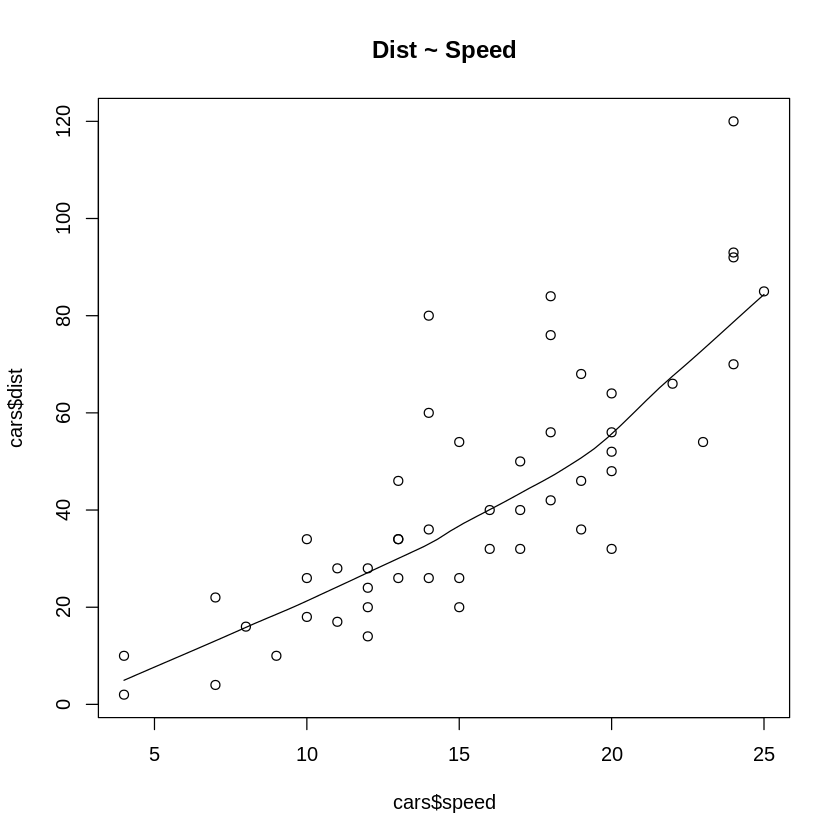

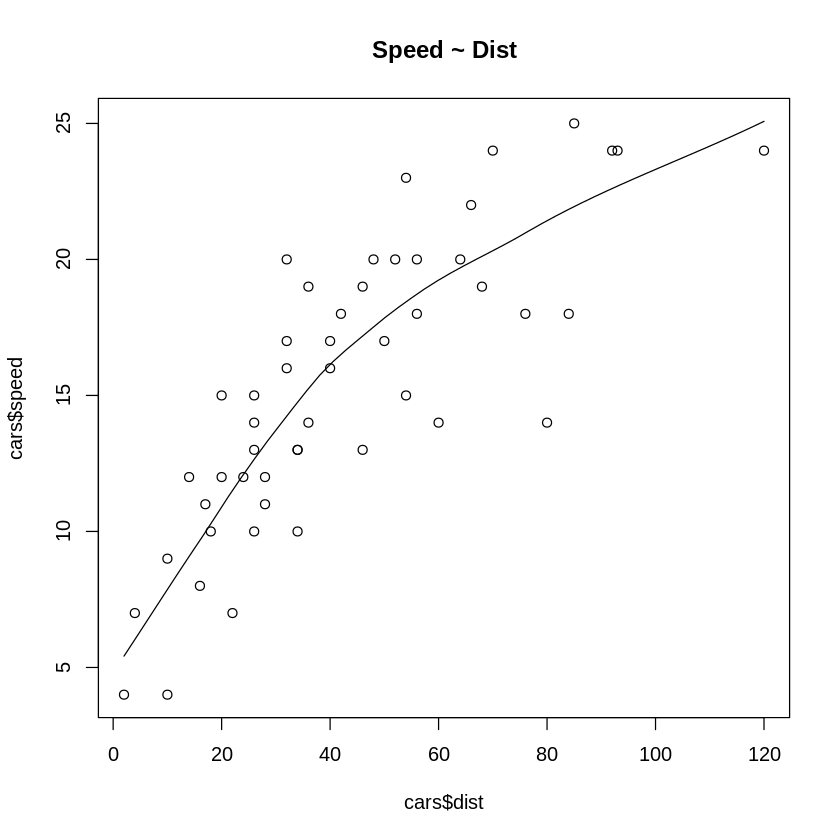

In [ ]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")

# its not truly linear but not entirely curvilinear either.
# is pretty much linear but starts to curve around 20

# if you switch x and y, it'll still be positively correlated but interpretation is different
scatter.smooth(x=cars$dist, y=cars$speed, main="Speed ~ Dist")

## Check for outliers

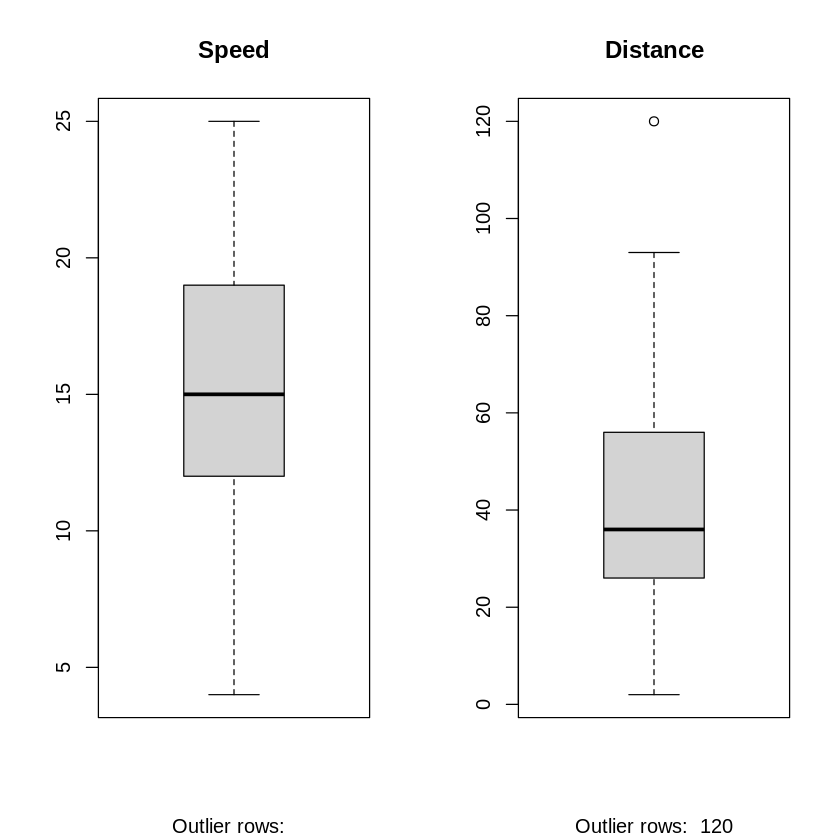

In [ ]:
par(mfrow=c(1, 2)) # divide graph area in 2 columns

boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ",
boxplot.stats(cars$speed)$out)) # box plot for 'speed'

boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ",
boxplot.stats(cars$dist)$out)) # box plot for 'distance'

# we see that there is an outlier for distance

In [ ]:
install.packages('e1071')
library(e1071) # for skewness function

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




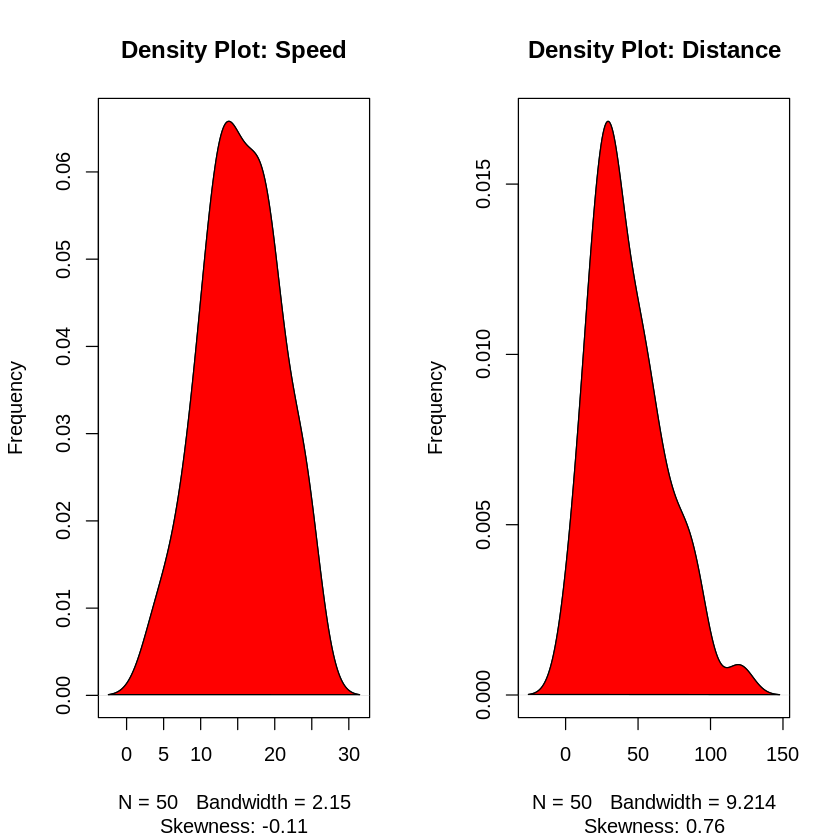

In [ ]:
par(mfrow=c(1, 2)) # divide graph area in 2 columns

# density plot for 'speed'
# round(e1071::skewness(cars$speed) outputs the amount of skewness
plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency",sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))
polygon(density(cars$speed), col="red")

# density plot for 'dist'
plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency",sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))
polygon(density(cars$dist), col="red")

## Correlation analysis

In [ ]:
# calculate correlation between speed and distance
cor(cars$speed, cars$dist)

[1] 0.8068949

In [ ]:
install.packages("corrplot")
install.packages("RcolorBrewer")
library(corrplot)
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘RcolorBrewer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘RColorBrewer’ ?”
corrplot 0.92 loaded



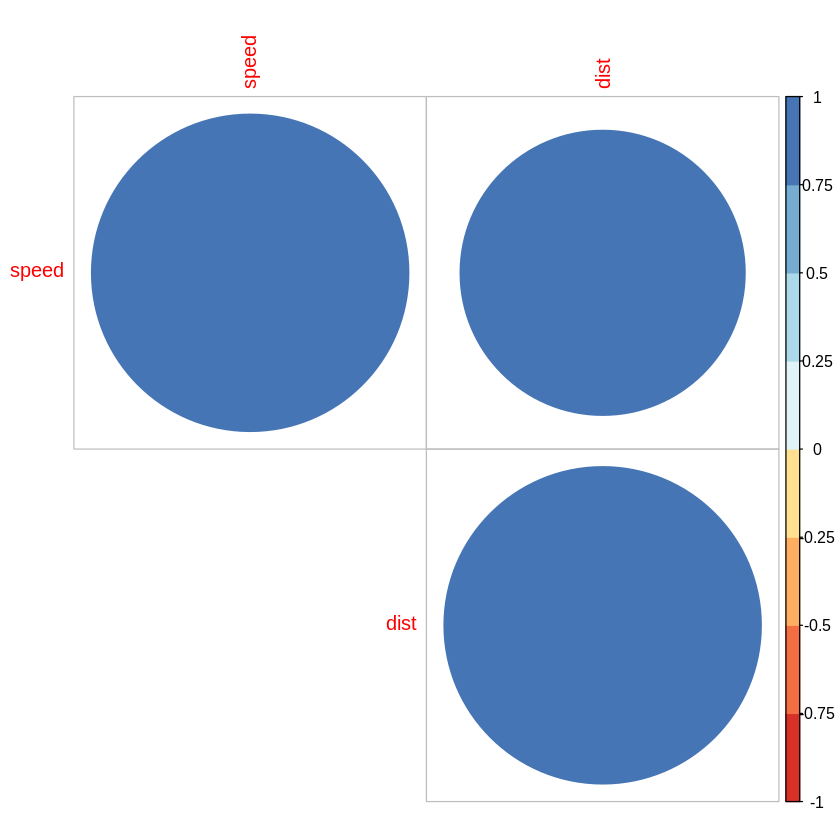

In [ ]:
M <-cor(cars)
corrplot(M, type="upper", order="hclust",col=brewer.pal(n=8, name="RdYlBu"))
# a visual similar to heatmaps

In [ ]:
install.packages("DAAG")
library(DAAG)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘png’, ‘jpeg’, ‘interp’, ‘rbibutils’, ‘latticeExtra’, ‘Rdpack’



Attaching package: ‘DAAG’


The following object is masked from ‘package:car’:

    vif




## Build the Linear Model

In [ ]:
# lm() creates a linear model
# dist ~ speed are the x and y
linearMod <- lm(dist ~ speed, data=cars)
linearMod


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


In [ ]:
summary(linearMod)

# you can see the model's performance under Coefficients by 'speed'
# We can use R-squard for goodness of fit
# Adjusted R-squared is useful when you have multiple variables
# p-value tells how the amount of error in terms of probability
# residual standard error tells the amount of error was actually made


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


## T-stat and p-value

In [ ]:
#capture model summary as an object
modelSummary <- summary(linearMod)

# model coefficients
modelCoeffs <- modelSummary$coefficients

# get beta estimate for speed
beta.estimate <- modelCoeffs["speed", "Estimate"]

# get std.error for speed
std.error <- modelCoeffs["speed", "Std. Error"]

# calc t statistic
t_value <- beta.estimate/std.error
print(t_value)

# calc p Value
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars))
print(p_value)

# fstatistic
f_statistic <- summary(linearMod)$fstatistic[1]
print(f_statistic)

# parameters for model p-value calc
f <- summary(linearMod)$fstatistic
print(f)
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

[1] 9.46399
[1] 1.489836e-12
   value 
89.56711 
   value    numdf    dendf 
89.56711  1.00000 48.00000 


## Standard Error and Goodness of Fit

In [ ]:
AIC(linearMod)
BIC(linearMod)

[1] 419.1569

[1] 424.8929

## Predicting using linear models

### Step 1


In [ ]:
# Create Training and Test data
# setting seed to reproduce results of random sampling
set.seed(100)
# row indices for training data
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars)) # randomly selecting 80% of data for training
# model training data
trainingData <- cars[trainingRowIndex, ]
# test data
testData <- cars[-trainingRowIndex, ]

### Step 2:  Fit the model on training data and predict dist on test data

In [ ]:
# Build the model on training data
lmMod <- lm(dist ~ speed, data=trainingData) # build the model
distPred <- predict(lmMod, testData) # predict distance

### Step 3: Review diagnostic measures

In [ ]:
# let's see how well the model is fitting
summary(lmMod)

# p-value (1.848e-10) has slightly increased
# t-statistic (8.608) decreased so model isn't fitting as well as it did for entire data
# r-squared (0.661) is slgihtly better than previous model
# we shouldnt JUST depend on r-squared values to compare models because there are other measures that need to be considered like residuals


Call:
lm(formula = dist ~ speed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.726 -11.242  -2.564  10.436  40.565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.1796     7.8254  -2.579   0.0139 *  
speed         4.2582     0.4947   8.608 1.85e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.49 on 38 degrees of freedom
Multiple R-squared:  0.661,	Adjusted R-squared:  0.6521 
F-statistic: 74.11 on 1 and 38 DF,  p-value: 1.848e-10


###  Step 4: Calculate accuracy and error rates

In [ ]:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))
correlation_accuracy <- cor(actuals_preds) # correlation
correlation_accuracy

,actuals,predicteds
actuals,1.0000000,0.9029504
predicteds,0.9029504,1.0000000


In [ ]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))
min_max_accuracy

[1] 0.7311131

In [ ]:
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)
mape

[1] 0.4959096

In [ ]:
cat("MAPE:",round(MAPE(actuals_preds$predicteds, actuals_preds$actuals),3))
cat("\nRMSE:",round(RMSE(actuals_preds$predicteds, actuals_preds$actuals),3))
cat("\nR_squarred:",round(R2_Score(actuals_preds$predicteds, actuals_preds$actuals),3))

# MAPE is high so it's not a great model. Pretty high errors

MAPE: 0.496
RMSE: 16.34
R_squarred: 0.514

## k- Fold Cross validation and its Purpose
Checks your model with other models to see how similar/different it is. Is your model better?

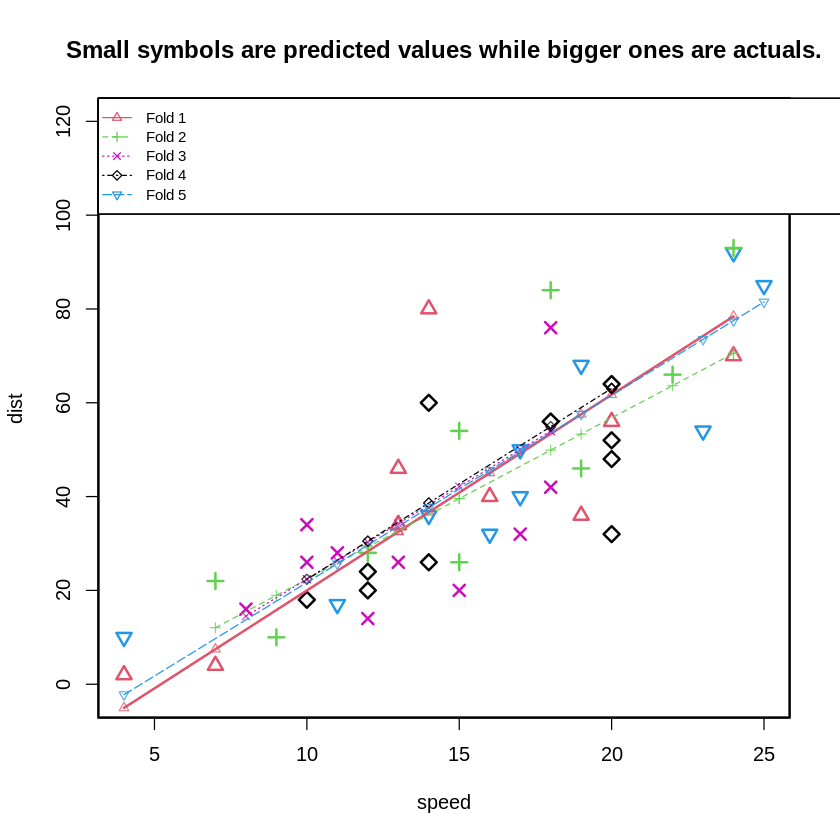

In [ ]:
# performs the CV
# CVlm allows us to cross verify by doing different splits of the data into training and testing
# m=5 creates 5 different models
cvResults <- suppressWarnings(CVlm(data=cars, form.lm=formula(dist ~ speed), m=5, dots=FALSE,
seed=29, legend.pos="topleft", printit=FALSE, main="Small symbols are predicted values while bigger ones are actuals."))


In [ ]:
attr(cvResults, 'ms') # 'ms' is the mean squared error of all 5 models

[1] 254.2661